# Simulation Problem 9
## Machine Learning HW3

#### Loading DataSet
|Island|code|Sex|code|Penguin|code|
|---|---|---|---|---|---|
|Biscoe|  0  |Female|  0  |Adelie|  0  |
|Dream|  1  |Male|  1  |Chinstrap|  1  |
|Torgersen|  2  |   |   |Gentoo|  2  |

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from os import chdir

chdir("/home/kassra/ML/HW_3/data")
df = pd.read_csv("penguins.csv")

df = df.replace({'FEMALE', 'MALE'}, {0.0,1.0})
df = df.replace({'Biscoe','Dream','Torgersen'},{0.0,1.0,2.0})
df = df.replace({'Adelie','Chinstrap','Gentoo'},{0.0,1.0,2.0})
df = df.fillna(value=-1)
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.0,0.0,39.1,18.7,181.0,3750.0,1.0
1,0.0,0.0,39.5,17.4,186.0,3800.0,0.0
2,0.0,0.0,40.3,18.0,195.0,3250.0,0.0
3,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,0.0,0.0,36.7,19.3,193.0,3450.0,0.0
...,...,...,...,...,...,...,...
339,2.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0
340,2.0,2.0,46.8,14.3,215.0,4850.0,0.0
341,2.0,2.0,50.4,15.7,222.0,5750.0,1.0
342,2.0,2.0,45.2,14.8,212.0,5200.0,0.0


#### Impute incomplete/corrupted data

In [2]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=-1, strategy='median')
data = df.to_numpy()
imp.fit(data)
data = imp.transform(data)

#### Visualize features

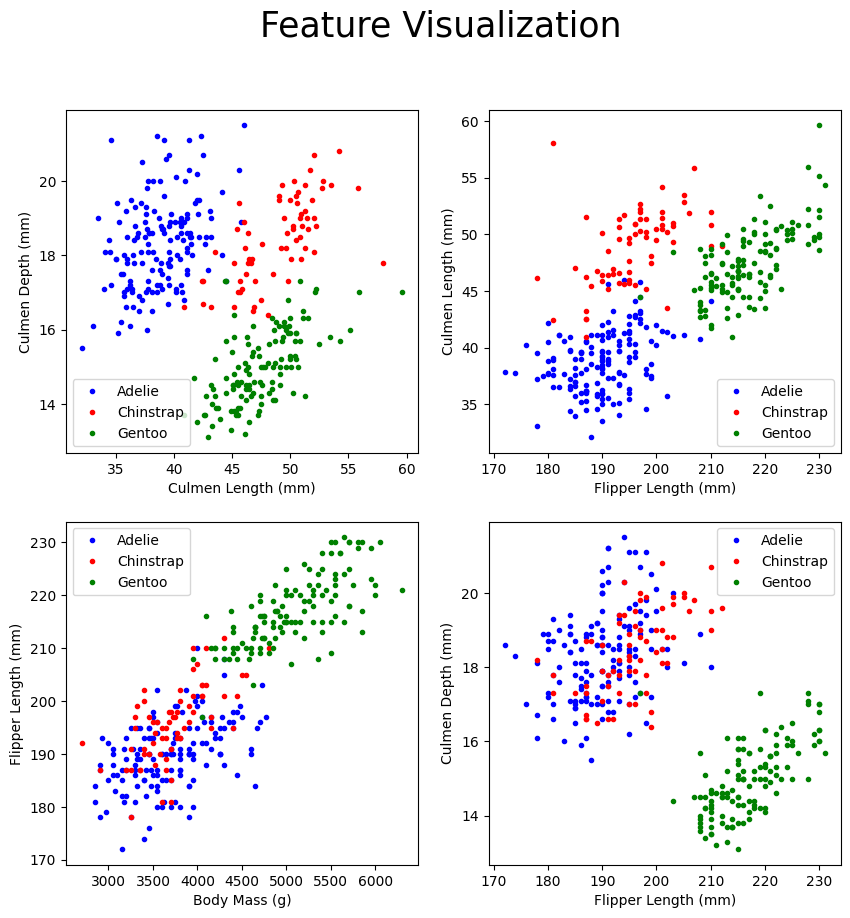

In [3]:
from matplotlib import pyplot as plt

adelie = list("")
chinstrap = list("")
gentoo = list("")

for i in range(data.shape[0]):
    if data[i, 0] == 0:
        adelie.append(data[i, 1:])
    elif data[i, 0] == 1:
        chinstrap.append(data[i,1:])
    else:
        gentoo.append(data[i, 1:])
adelie = np.array(adelie)
chinstrap = np.array(chinstrap)
gentoo = np.array(gentoo)


fig, ax = plt.subplots(2, 2)
fig.set_dpi(100)
fig.set_size_inches(10, 10)
fig.suptitle("Feature Visualization", fontsize=25)

ax[0, 0].plot(adelie[:, 1], adelie[:, 2], '.b', label="Adelie")
ax[0, 0].plot(chinstrap[:, 1], chinstrap[:, 2], '.r', label="Chinstrap")
ax[0, 0].plot(gentoo[:, 1], gentoo[:, 2], '.g', label="Gentoo")
ax[0, 0].set_xlabel('Culmen Length (mm)')
ax[0, 0].set_ylabel('Culmen Depth (mm)')
ax[0, 0].legend()

ax[0, 1].plot(adelie[:, 3], adelie[:, 1], '.b', label="Adelie")
ax[0, 1].plot(chinstrap[:, 3], chinstrap[:, 1], '.r', label="Chinstrap")
ax[0, 1].plot(gentoo[:, 3], gentoo[:, 1], '.g', label="Gentoo")
ax[0, 1].set_xlabel('Flipper Length (mm)')
ax[0, 1].set_ylabel('Culmen Length (mm)')
ax[0, 1].legend()

ax[1, 0].plot(adelie[:, 4], adelie[:, 3], '.b', label="Adelie")
ax[1, 0].plot(chinstrap[:, 4], chinstrap[:, 3], '.r', label="Chinstrap")
ax[1, 0].plot(gentoo[:, 4], gentoo[:, 3], '.g', label="Gentoo")
ax[1, 0].set_xlabel('Body Mass (g)')
ax[1, 0].set_ylabel('Flipper Length (mm)')
ax[1, 0].legend()

ax[1, 1].plot(adelie[:, 3], adelie[:, 2], '.b', label="Adelie")
ax[1, 1].plot(chinstrap[:, 3], chinstrap[:, 2], '.r', label="Chinstrap")
ax[1, 1].plot(gentoo[:, 3], gentoo[:, 2], '.g', label="Gentoo")
ax[1, 1].set_xlabel('Flipper Length (mm)')
ax[1, 1].set_ylabel('Culmen Depth (mm)')
ax[1, 1].legend()

Seperate Training Data

In [4]:
x_train, x_test, y_train, y_test = train_test_split(data[:,1:], data[:,0], test_size=0.2)

x_train_1 = x_train[:,1:3]
x_test_1 = x_test[:,1:3]

x_train_2 = np.hstack((x_train[:,3].reshape(x_train.shape[0],1), x_train[:,1].reshape(x_train.shape[0],1)))
x_test_2 = np.hstack((x_test[:,3].reshape(x_test.shape[0],1), x_test[:,1].reshape(x_test.shape[0],1)))

x_train_3 = np.hstack((x_train[:,4].reshape(x_train.shape[0],1), x_train[:,3].reshape(x_train.shape[0],1)))
x_test_3 = np.hstack((x_test[:,4].reshape(x_test.shape[0],1), x_test[:,3].reshape(x_test.shape[0],1)))

x_train_4 = np.hstack((x_train[:,3].reshape(x_train.shape[0],1), x_train[:,2].reshape(x_train.shape[0],1)))
x_test_4 = np.hstack((x_test[:,3].reshape(x_test.shape[0],1), x_test[:,2].reshape(x_test.shape[0],1)))

In [7]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
from scipy.stats import multivariate_normal

class GMM:
    def __init__(self, n_class, n_feature, k):
        self.n_class = n_class
        self.n_feature = n_feature
        self.k = k
        #self.model = list([GaussianMixture(n_components=k, random_state=1)] * n_class)
        self.model = list("")
        for i in range (self.n_class):
            self.model.append(GaussianMixture(n_components=k, random_state=1))
        pass

    def update(self, x, y):
        samples = list("")
        for i in range(self.n_class):
            samples.append(np.array(x[y == i]))
        aic = 0
        bic = 0
        for i in range(self.n_class):
            self.model[i].fit(samples[i], np.array([i] * samples[i].shape[0]))
            aic += self.model[i].aic(samples[i])
            bic += self.model[i].bic(samples[i])
        return aic, bic

    def predict(self, x):
        likelihood = list("")
        for i in range(self.n_class):
            likelihood.append(self.model[i].score_samples(x))
        likelihood = np.array(likelihood).T
        return np.argmax(likelihood,axis=1)


def plot(x, y, means, covariances, k):
    adelie = list("")
    chinstrap = list("")
    gentoo = list("")

    for i in range(x.shape[0]):
        if y[i] == 0:
            adelie.append(x[i])
        elif y[i] == 1:
            chinstrap.append(x[i])
        else:
            gentoo.append(x[i])
    adelie = np.array(adelie)
    chinstrap = np.array(chinstrap)
    gentoo = np.array(gentoo)

    plt.plot(adelie[:,0], adelie[:,1],'.b', label="Adelie")
    plt.plot(chinstrap[:,0], chinstrap[:,1],'.r', label="Chinstrap")
    plt.plot(gentoo[:,0], gentoo[:,1],'.g', label="gentoo")
    plt.legend()

    for i in range(means.shape[0]):
        deltaX = (max(x[:,0]) - min(x[:,0]))/10
        deltaY = (max(x[:,1]) - min(x[:,1]))/10
        xmin = min(x[:,0]) - deltaX
        xmax = max(x[:,0]) + deltaX
        ymin = min(x[:,1]) - deltaY
        ymax = max(x[:,1]) + deltaY
        xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

        target = multivariate_normal(mean=means[i], cov=covariances[i])
        xy = target.rvs()
        xy2 = target.rvs() 
        zz = target.pdf(np.dstack((xx, yy)))
        plt.contour(xx,yy, zz, levels=np.sort([target.pdf(xy), target.pdf(xy2)]))
    plt.title("Actual Data and GMM Contours (Acc=" + str(k)[:5] + ")")
    plt.show()

### GMM Contours (k=2)

Accuracy of classifier with feature set( 1 ) =  94.20289855072464


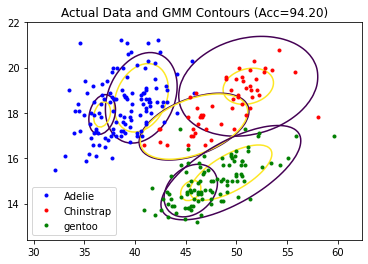

Accuracy of classifier with feature set( 2 ) =  94.20289855072464


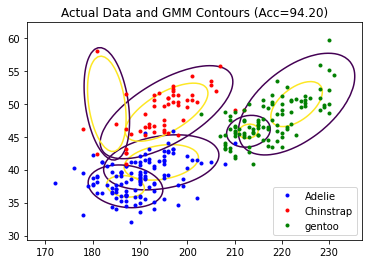

Accuracy of classifier with feature set( 3 ) =  68.11594202898551


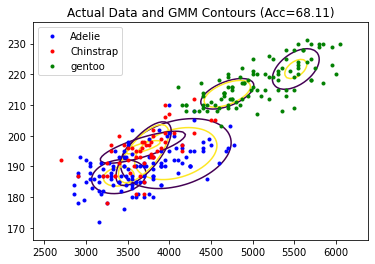

Accuracy of classifier with feature set( 4 ) =  66.66666666666666


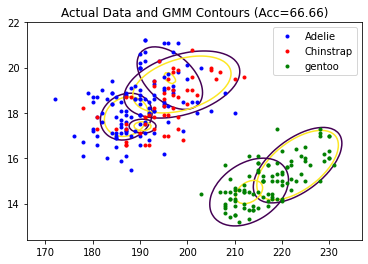

In [8]:
classifier = GMM(3,2,2)
feature = [x_train_1, x_train_2, x_train_3, x_train_4]
test = [x_test_1, x_test_2, x_test_3, x_test_4]

for i in range(len(feature)):
    classifier.update(feature[i], y_train)
    accuracy = accuracy_score(y_test,classifier.predict(test[i]))*100
    print("Accuracy of classifier with feature set(", i+1, ") = ", accuracy)
    mu = list("")
    sigma = list("")
    for j in range(classifier.n_class):
        for k in range(classifier.model[j].weights_.shape[0]):
            mu.append(classifier.model[j].means_[k])
            sigma.append(classifier.model[j].covariances_[k])
    mu = np.array(mu)
    sigma = np.array(sigma)
    plot(feature[i], y_train, mu, sigma, accuracy)

In [13]:
for i in range(2,6):
    print("GMM Components: ", i)
    classifier = GMM(3, 2, i)
    classifier.update(x_train_1,y_train)
    print("Accuracy for first set of features: ", accuracy_score(y_test, classifier.predict(x_test_1)) * 100, "%")
    classifier.update(x_train_2,y_train)
    print("Accuracy for second set of features: ", accuracy_score(y_test, classifier.predict(x_test_2)) * 100, "%")
    classifier.update(x_train_3,y_train)
    print("Accuracy for third set of features: ", accuracy_score(y_test, classifier.predict(x_test_3)) * 100, "%")
    classifier.update(x_train_4,y_train)
    print("Accuracy for fourth set of features: ", accuracy_score(y_test, classifier.predict(x_test_4)) * 100, "%")
    print("---------------------------------------------")

GMM Components:  2
Accuracy for first set of features:  98.55072463768117 %
Accuracy for second set of features:  95.65217391304348 %
Accuracy for third set of features:  79.71014492753623 %
Accuracy for fourth set of features:  78.26086956521739 %
---------------------------------------------
GMM Components:  3
Accuracy for first set of features:  97.10144927536231 %
Accuracy for second set of features:  95.65217391304348 %
Accuracy for third set of features:  81.15942028985508 %
Accuracy for fourth set of features:  84.05797101449275 %
---------------------------------------------
GMM Components:  4
Accuracy for first set of features:  97.10144927536231 %
Accuracy for second set of features:  95.65217391304348 %
Accuracy for third set of features:  81.15942028985508 %
Accuracy for fourth set of features:  81.15942028985508 %
---------------------------------------------
GMM Components:  5
Accuracy for first set of features:  98.55072463768117 %
Accuracy for second set of features:  9

Based on the Accuracy of classifier, best set of feature is (culmen depth and culmen length)

#### Evaluation of classifier with best set of features

Accuracy ( 2  component) =  98.55072463768117
Accuracy ( 3  component) =  97.10144927536231
Accuracy ( 4  component) =  97.10144927536231
Accuracy ( 5  component) =  98.55072463768117
Accuracy ( 6  component) =  97.10144927536231
Accuracy ( 7  component) =  98.55072463768117
Accuracy ( 8  component) =  98.55072463768117
Accuracy ( 9  component) =  100.0


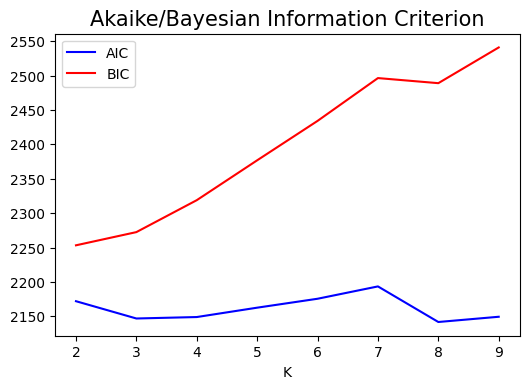

In [24]:
AIC = list("")
BIC = list("")

for i in range (2,10):
    classifier = GMM(3, 2, i)
    aic, bic = classifier.update(x_train_1, y_train)
    AIC.append(aic)
    BIC.append(bic)
    mu = list("")
    cov = list("")
    for j in range(classifier.n_class):
        for k in range(len(classifier.model[j].weights_)):
            mu.append(classifier.model[j].means_[k]) 
            cov.append(classifier.model[j].covariances_[k])
    mu = np.array(mu)
    cov = np.array(cov) 
    print("Accuracy (", i," component) = ",accuracy_score(y_test, classifier.predict(x_test_1)) * 100)
    # plot(x_train_1, y_train, mu, cov, i)

plt.plot(range(2,10), AIC, 'b', label="AIC")
plt.plot(range(2,10), BIC, 'r', label="BIC")
plt.xlabel("K")
plt.legend()
plt.title("Akaike/Bayesian Information Criterion", fontsize=15)
plt.gcf().set_dpi(100)
plt.show()